In [25]:
import pandas as pd 
from pandas_datareader import data as pdr 
import yfinance as yf 

yf.pdr_override()

dow = pdr.get_data_yahoo('^DJI', '2000-01-04')
kospi = pdr.get_data_yahoo('^KS11', '2000-01-04')

# plt.scatter(dow, kospi, marker='.') error 발생. 데이터 개수가 다르기때문
df = pd.DataFrame({'X': dow['Close'], 'Y': kospi['Close']})
# df Nan을 제거해야함
df = df.fillna(method='bfill')
df = df.fillna(method='ffill')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,X,Y
Date,,
2000-01-03,11357.509766,1059.040039
2000-01-04,10997.929688,1059.040039
2000-01-05,11122.650391,986.309998
2000-01-06,11253.259766,960.789978
2000-01-07,11522.559570,948.650024
...,...,...
2020-11-13,29479.810547,2493.870117
2020-11-16,29950.439453,2543.030029
2020-11-17,29783.349609,2539.149902


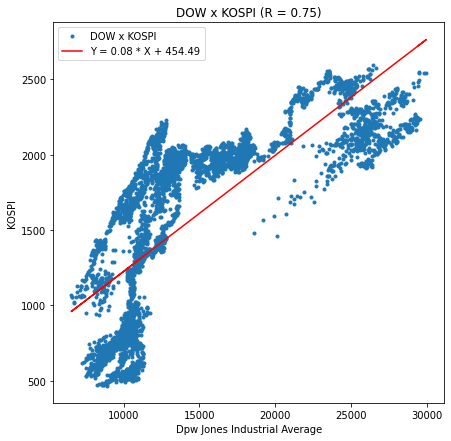

In [27]:
import matplotlib.pyplot as plt 
from scipy import stats
regr = stats.linregress(df.X, df.Y)
regr_line = f'Y = {regr.slope:.2f} * X + {regr.intercept:.2f}'
plt.figure(figsize=(7, 7))
plt.plot(df.X, df.Y, '.')
plt.plot(df.X, regr.slope * df.X + regr.intercept, 'r')
plt.legend(['DOW x KOSPI', regr_line])
plt.title(f'DOW x KOSPI (R = {regr.rvalue:.2f})')
plt.xlabel('Dpw Jones Industrial Average')
plt.ylabel('KOSPI')
plt.show()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


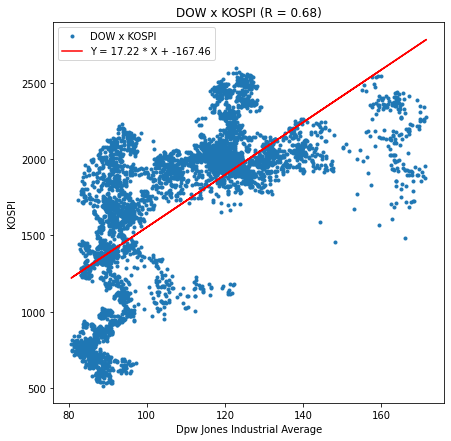

In [30]:
# KOSPI 지수와 미국 국채 상관관계
import pandas as pd 
from pandas_datareader import data as pdr 
import yfinance as yf 

yf.pdr_override()

dow = pdr.get_data_yahoo('TLT', '2002-07-30')
kospi = pdr.get_data_yahoo('^KS11', '2002-07-30')

# plt.scatter(dow, kospi, marker='.') error 발생. 데이터 개수가 다르기때문
df = pd.DataFrame({'X': dow['Close'], 'Y': kospi['Close']})
# df Nan을 제거해야함
df = df.fillna(method='bfill')
df = df.fillna(method='ffill')

import matplotlib.pyplot as plt 
from scipy import stats
regr = stats.linregress(df.X, df.Y)
regr_line = f'Y = {regr.slope:.2f} * X + {regr.intercept:.2f}'
plt.figure(figsize=(7, 7))
plt.plot(df.X, df.Y, '.')
plt.plot(df.X, regr.slope * df.X + regr.intercept, 'r')
plt.legend(['DOW x KOSPI', regr_line])
plt.title(f'DOW x KOSPI (R = {regr.rvalue:.2f})')
plt.xlabel('Dpw Jones Industrial Average')
plt.ylabel('KOSPI')
plt.show()

In [31]:
import pandas as pd 
s1 = pd.Series([+10, -20, +30, -40, +50])
s2 = pd.Series([+1, -2, +3, -4, +5])
s3 = pd.Series([-10, +20, -30, +40, -50])
df = pd.DataFrame({'S1': s1, 'S2': s2, 'S3' :s3})
df

,S1,S2,S3
0,10,1,-10
1,-20,-2,20
2,30,3,-30
3,-40,-4,40
4,50,5,-50


In [32]:
df.corr()

,S1,S2,S3
S1,1.0,1.0,-1.0
S2,1.0,1.0,-1.0
S3,-1.0,-1.0,1.0
